<a href="https://colab.research.google.com/github/alexandre858/DataMinig/blob/main/Projet_suggestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#Partie 1 du programme 
import os,sys
import json
import pathlib
import pandas
from PIL import Image
import matplotlib.pyplot as plot
import numpy
import math
from sklearn.cluster import MiniBatchKMeans

try:
   os.mkdir('data')
except:
    pass


donnees={}


 
path = '.'
 
files = os.listdir(path+"/images")

i=1
for name in files:
  if os.path.isfile("images/"+name):
    
    imgfile = Image.open("images/"+name)

    #algoritme qui détermine la couleur dominante d'une image
    #---------------------------------------------------
    numarray = numpy.array(imgfile.getdata(), numpy.uint8)

    cluster_count = 6

    clusters = MiniBatchKMeans(n_clusters = cluster_count)
    clusters.fit(numarray)

    npbins = numpy.arange(0, cluster_count + 1)
    histogram = numpy.histogram(clusters.labels_, bins=npbins)




    data=numpy.where(histogram[0]==max(histogram[0]))

    array=numpy.delete(histogram[0],data[0])

    index=numpy.where(histogram[0]==max(array))

    print (index[0][0])


    print("couleur dominante rgb :" ,math.ceil(clusters.cluster_centers_[index[0][0]][0]),
            math.ceil(clusters.cluster_centers_[index[0][0]][1]) ,
              math.ceil(clusters.cluster_centers_[index[0][0]][2] ) )

    

    #---------------------------------------------------




 
    #analyse taux de présence couleu
    #---------------------------------------------------
    histogram = imgfile.histogram()
    if (len(histogram)==1024 or len(histogram)==768):

      red = histogram[0:255]
      green = histogram[256:511]
      blue = histogram[512:767]

      total_red=0
      total_blue=0
      total_green=0

      j=0
      while j <255:
        total_red=total_red+red[j]*j
        total_blue=total_blue+blue[j]*j
        total_green=total_green+green[j]*j
        j+=1

    else:
      total_red="mono"
      total_green="mono"
      total_blue ="mono"
    #---------------------------------------------------


    #récupération des données sur le format de l'image
    #---------------------------------------------------
    hauteur=imgfile.size[0]
    largeur=imgfile.size[1]
    format=imgfile.format
    #---------------------------------------------------


    donnees[i-1]={"name":name,"size_high":hauteur,
                    "size_lenght":largeur,"format":format,
                      "red":total_red,"green":total_green,"blue":total_blue}

    i=i+1 

with open("data/data.json", "w") as file:
    json.dump(donnees, file,indent = 3)








In [ ]:
#test taux de presence
from PIL import Image
import matplotlib.pyplot as plot
imgfile = Image.open("./images/archeops.png")


histogram = imgfile.histogram()
# we have three bands (for this image)
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]

total_red=0
total_blue=0
total_green=0

i=0
while i <255:
  total_red=total_red+red[i]*i
  total_blue=total_blue+blue[i]*i
  total_green=total_green+green[i]*i
  i+=1


print(total_red,total_blue,total_green)





 

334382 511705 574290


[11592  1037   366   335   411   659]
[[  0.           0.           0.           0.        ]
 [118.71255438 177.38222498 220.83219391 252.16842759]
 [178.80396246 188.38164755 196.65067779  86.4181439 ]
 [ 71.38590957  90.76130389 105.47844374 248.08201893]
 [227.48756661 242.44849023 243.05150977 254.69804618]
 [ 73.55867014 133.21056063 168.00912647 247.2535854 ]]
[11592  1037   366   335   411   659]
1
couleur dominante rgb : 119 178 221


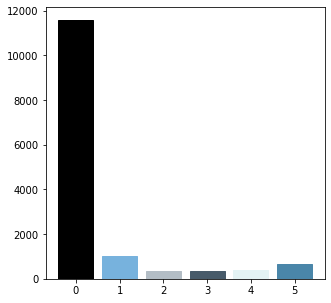

In [41]:
#test kmeans

from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import MiniBatchKMeans
imgfile = Image.open("images_total/articuno.png")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)

fig, axes = plot.subplots(nrows=1, ncols=1, figsize=(5,5))


cluster_count = 6

clusters = MiniBatchKMeans(n_clusters = cluster_count)
clusters.fit(numarray)

npbins = numpy.arange(0, cluster_count + 1)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)
barlist = axes.bar(labels, histogram[0])
print (histogram[0])
print(clusters.cluster_centers_)
for i in range(cluster_count):
    barlist[i].set_color('#%02x%02x%02x' % (
    math.ceil(clusters.cluster_centers_[i][0]),
        math.ceil(clusters.cluster_centers_[i][1]), 
    math.ceil(clusters.cluster_centers_[i][2])))

print (histogram[0])
data=numpy.where(histogram[0]==max(histogram[0]))

array=numpy.delete(histogram[0],data[0])

index=numpy.where(histogram[0]==max(array))

array=numpy.delete(histogram[0],data[0])
print (index[0][0])


print("couleur dominante rgb :" ,math.ceil(clusters.cluster_centers_[index[0][0]][0]),
        math.ceil(clusters.cluster_centers_[index[0][0]][1]) ,
          math.ceil(clusters.cluster_centers_[index[0][0]][2] ) )




